# Qiskit Fall Fest - Challenge

Nella prima lezione avete visto che per misurare il valor medio di un operatore (ad esempio $X$) sullo stato a singolo qubit $\vert \psi\rangle =U \vert 0 \rangle$ dobbiamo trovare l'operatore $\tilde{U}$ che diagonalizza $X$.
$$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$
Sappiamo che gli autovalori di $X$ sono:
$$\vert + \rangle = \frac{1}{\sqrt{2}} (\vert 0 \rangle + \vert 1 \rangle ) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}$$
$$\vert - \rangle = \frac{1}{\sqrt{2}} (\vert 0 \rangle - \vert 1 \rangle ) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix}$$
E quindi:
$$\implies \tilde{U}=\left( \vert +\rangle, \vert -\rangle \right)=\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}=H$$
Con questi semplici passaggi possiamo quindi ricavare il valor medio di $X$ misurando sulla base computazionale:
$$\implies \langle X \rangle =\langle \psi \vert X \vert \psi \rangle = \langle \psi \vert H (H X H) H \vert \psi \rangle  = \langle \psi \vert H \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} H \vert \psi \rangle = \langle \tilde{\psi} \vert  \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}  \vert \tilde{\psi} \rangle= p_0-p_1  $$
dove $p_0$ ($p_1$) è la probabilità di misurare 0 (1) e $\vert \tilde{\psi} \rangle = H \vert \psi \rangle = H U \vert 0 \rangle $


### Challenge
Cercare di rispondere al maggior numero di quesiti nel modo che ritenete più opportuno. Potete usare qualsiasi risorsa che ritenete necessaria ( tutorial di Qiskit, internet ecc.)

1. Generare, usando un circuito quantistico, lo stato $\vert \psi \rangle = -\frac{1}{2} \vert 0 \rangle + \frac{\sqrt{3}}{2} \vert 1 \rangle$. Verificare la correttezza del circuito utilizzando lo $statevector$ $simulator$, l'$Aer$ $simulator$ e facendo il grafico di questo stato sulla sfera di Bloch

## Solution 1

A Ry($\theta$) rotation takes the state $\vert 0 \rangle$ and turns It into $cos(\theta/2)\vert 0 \rangle + sen(\theta/2)\vert 1 \rangle$, so we just have to insert the right angle to have $\vert \psi \rangle$

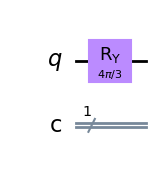

In [76]:
from qiskit import(QuantumCircuit, QuantumRegister, ClassicalRegister, execute, transpile)
from qiskit.visualization import plot_histogram, plot_gate_map
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options # Importiamo tutto il necessario
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit_ibm_provider import IBMProvider
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

theta = 4*np.pi/3
qc = QuantumCircuit(1, 1)
qc.ry(theta, 0)

qc.draw("mpl")

Now let's measure the circuit. First with AerSimulator

{'1 0': 776, '0 0': 248}

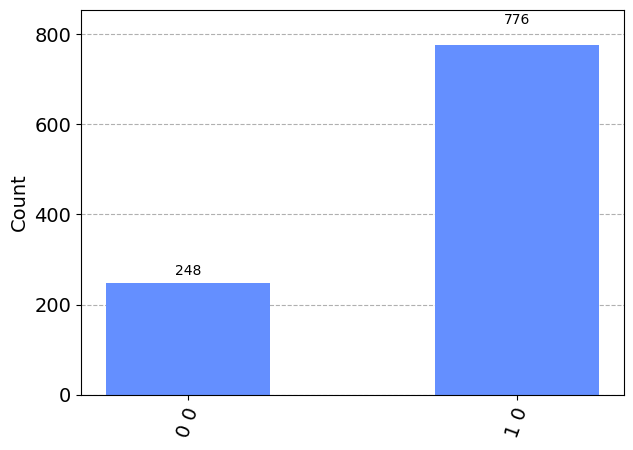

In [77]:
qc.measure_all()
sim = AerSimulator() # Creiamo un simulatore Aer chiamato sim

job = sim.run(qc) # Eseguiamo il circuito qc nel simulatore
result = job.result() # Memorizziamo i risultati dell'esecuzione in una variabile chiamata result

counts = result.get_counts() # Visualizziamo i risultati
display(counts)
plot_histogram(counts)

Now with Statevector

In [78]:
# Simuliamo su statevector

qc = QuantumCircuit(1) # Creiamo un QuantumCircuit di 1 qubit per generare lo stato e 1 classico per vedere com'è fatto lo stato

# Applichiamo la rotazione scelta
qc.ry(theta, 0)

vector = Statevector(qc)
display(vector.draw('latex'))

<IPython.core.display.Latex object>

And draw this statevector into the Bloch Sphere

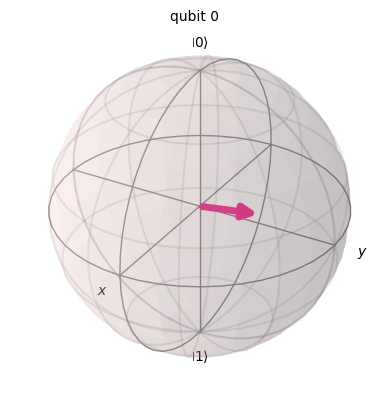

In [79]:
from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(vector)

2. Ricavare la forma matriciale dell'operatore che diagonalizza $Y=\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$, e la sua decomposizione in gate quantistici dispobili su Qiskit

## Solution 2

The $Y$ eignevectors are $\vert y_+ \rangle = \frac{1}{\sqrt{2}} (\vert 0 \rangle + i\vert 1 \rangle)$ and $\vert y_- \rangle = \frac{1}{\sqrt{2}} (\vert 0 \rangle - i\vert 1 \rangle)$. You can note they are the eigenvectors of $X$ except a $e^{i \pi/2}$ phase on the $\vert 1 \rangle$.

So we can send  $\vert 0 \rangle$ (resp. $\vert 1 \rangle$) to $\vert y_+ \rangle$ (resp. $\vert y_- \rangle$) by applying the $H$ gate and then the $S$ phase gate. In symbols, $\vert y_+ \rangle = SH\vert 0 \rangle$ and $\vert y_- \rangle = SH\vert 1 \rangle$

Let'see with statevector If It works

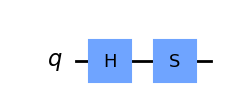

In [80]:
qc = QuantumCircuit(1)
#qc.x(0)
qc.h(0)
qc.s(0)

qc.draw("mpl")

In [81]:
sim = StatevectorSimulator() # Creiamo un simulatore Aer chiamato sim

state = execute(qc, sim).result().get_statevector()
state

Statevector([7.07106781e-01+0.j        , 4.32978028e-17+0.70710678j],
            dims=(2,))


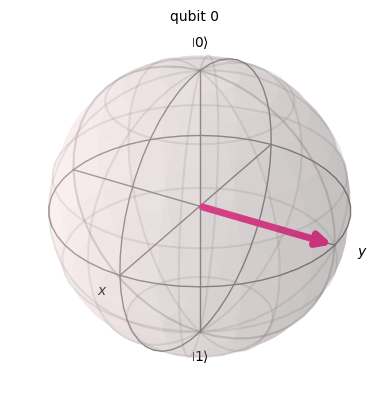

In [82]:
plot_bloch_multivector(state)

So, the matrix which diagonalizes $Y$ is $\frac{1}{2} \begin{bmatrix} 1 & 1 \\ i & -i \end{bmatrix}$.
To have the decomposition in native gates we can use the transpiler:

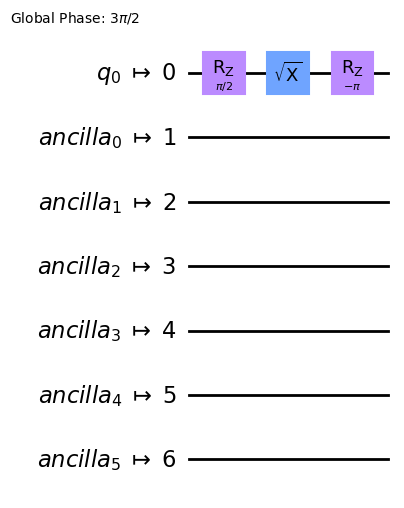

In [84]:
#provider = IBMProvider(instance="ibm-q/open/main")

backend = provider.get_backend("ibm_lagos")
backendSimulator =  AerSimulator.from_backend(backend)
layout=[0]
circuitTranspiled=transpile(qc,backendSimulator,initial_layout=layout,optimization_level=1)
circuitTranspiled.draw('mpl')

Is It really the same thing? Let's find out by multiplicating the matrices to be extra sure.

In [152]:
def print_pretty_matrix(matrix, decimals=2):
    np.set_printoptions(precision=decimals, suppress=True)
    print(np.matrix(matrix))

In [155]:
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import RZGate, SXGate, SGate, HGate

print("HS matrix")
print_pretty_matrix(Operator(SGate()).dot(HGate()))

SX = Operator(SXGate())
RZ1 = Operator(RZGate(np.pi/2))
RZ2 = Operator(RZGate(-np.pi))

SXRZ = SX.dot(RZ1)
print("")
print("Transpiled HS matrix")
print_pretty_matrix((- 1.j)*RZ2.dot(SXRZ))

HS matrix
[[0.71+0.j   0.71+0.j  ]
 [0.  +0.71j 0.  -0.71j]]

Transpiled HS matrix
[[ 0.71-0.j    0.71-0.j  ]
 [-0.  +0.71j  0.  -0.71j]]



3. Usare l'operatore trovato per calcolare il valor medio di $Y$ sullo stato $\vert \psi \rangle$ (del punto 1.) usando l'$Aer$ $simulator$ o il $sampler$. Confrontare i risultati ottenuti con lo $statevector$ $simulator$ (o se preferite con un calcolo fatto "a mano") e l'$\bm{estimator}$.

Let's define a function to average the samples

In [86]:
def get_avg(counts):
    avg=0
    tot=0
    for key in counts:
        tot+= counts[key]
        if int(key) == 0:
            avg+= counts[key]
        else:
            avg+= - counts[key]
    return avg/tot

Now let's build the circuit to rotate the basis to the $Y$ one and sample with AerSimulator

In [102]:
# Aer
theta = 4*np.pi/3

qc_avgy = QuantumCircuit(1) 
qc_avgy.ry(theta, 0)
# Utilizzaimo i risultati di prima per ruotarci nella base computazionale, applichiamo Phase Gate Dagato e Hadamard
qc_avgy.sdg(0)
qc_avgy.h(0)
# Misuriamo
qc_avgy.measure_all()

counts=sim.run(qc_avgy,shots=1000).result().get_counts()
avg_y = get_avg(counts)

#Plottiamo due risultati
print(f">>> AerSimulator counts: {counts}")
print("")
print(f">>> AerSimulator Expectation value: {avg_y}")
# Mettiamo una deviazione standard

>>> AerSimulator counts: {'0': 474, '1': 526}

>>> AerSimulator Expectation value: -0.052


Compare the results with Estimator

In [132]:
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp

# Prepariamo lo stato
qc_avgy = QuantumCircuit(1) 
qc_avgy.ry(theta, 0)
# Misuriamo lo stato
estimator = Estimator()
job = estimator.run(qc_avgy, SparsePauliOp('Y',1))

print(f">>> Estimator Expectation value: {job.result().values[0]}")

>>> Estimator Expectation value: 0.0


And "by hand" using statevector simulator

In [133]:
# Mostriamo lo stato con Statevector
qc_avgy = QuantumCircuit(1) 
qc_avgy.ry(theta, 0)
# Utilizzaimo i risultati di prima per ruotarci nella base computazionale
qc_avgy.sdg(0)
qc_avgy.h(0)

vector = Statevector(qc_avgy)
print(">>> Statevector to sample:")
display(vector.draw('latex'))

# Se prendessimo questo stato e lo misurassimo sulla base computazionale otterremmo proprio quello che cerchiamo

>>> Statevector to sample:


<IPython.core.display.Latex object>

4. Trovare lo "sviluppo" (i coefficienti $a$, $b$, $c$ e $d$) sulle matrici di Pauli $X=\begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix}$, $Y=\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$, $Z=\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$ e l'identità $I=\begin{bmatrix} 1 & 0\\ 0 & 1 \end{bmatrix}$ dell'operatore:

$$ A = \begin{bmatrix} -1 & 1- 0.5i\\1+0.5i & -5\end{bmatrix}=a X+ bY+ cZ+ dI$$

5. Calcolare il valor medio di questa osservabile su $\vert \psi \rangle$ (del punto 1.) usando l'$estimator$ e il $sampler$ (o l'$Aer$ $simulator$)

In [151]:
# Punto 4:

# Sappiamo che le matrici di Pauli sono ortognali tra loro, definito il prod scalare tra matrici come Tr(A*B).
# Formano una base completa con l'aggiunta dell'I.
# Ci basta proiettare sui 4 elementi della base per trovare i relativi coefficienti

def pauli_decomposition(matrix):
    # definiamo le matrici di Pauli
    sigma_0 = np.array([[1, 0], [0, 1]])
    sigma_1 = np.array([[0, 1], [1, 0]])
    sigma_2 = np.array([[0, -1j], [1j, 0]])
    sigma_3 = np.array([[1, 0], [0, -1]])

    # proiettiamo e troviamo i coefficienti
    a = np.trace(np.dot(matrix, sigma_0)) / 2.0
    b = np.trace(np.dot(matrix, sigma_1)) / 2.0
    c = np.trace(np.dot(matrix, sigma_2)) / 2.0
    d = np.trace(np.dot(matrix, sigma_3)) / 2.0

    return [a,b,c,d]

# Quindi per la nostra matrice i coefficienti sono:

A = np.array([[-1, 1 - 0.5j],
              [1 + 0.5j, -5]])

coeffs = pauli_decomposition(A)
print(f">>> X Coefficient: {coeffs[0]}")
print(f">>> Y Coefficient: {coeffs[1]}")
print(f">>> Z Coefficient: {coeffs[2]}")
print(f">>> I Coefficient: {coeffs[3]}")

>>> X Coefficient: (-3+0j)
>>> Y Coefficient: (1+0j)
>>> Z Coefficient: (0.5+0j)
>>> I Coefficient: (2+0j)


In [182]:
# Punto 5

# Facciamo un circuito per ogni operatore da valutare
theta=4*np.pi/3
# Inizializziamo un circuito sullo stato iniziale
qc_x= QuantumCircuit(1)
qc_x.rz(theta, 0)
# Utilizziamo la rotazione opportuna per metterci sulla base giusta
qc_x.h(0)
# Misuriamo
qc_x.measure_all()
counts=sim.run(qc_x,shots=1000).result().get_counts()
avg_x = get_avg(counts)

#Ripetiamo per Y
qc_y= QuantumCircuit(1)
qc_y.rz(theta, 0)
qc_y.h(0)
qc_y.measure_all()
counts=sim.run(qc_y,shots=1000).result().get_counts()
avg_y = get_avg(counts)

#Ripetiamo per Z
qc_z= QuantumCircuit(1)
qc_z.measure_all()
counts=sim.run(qc_z,shots=1000).result().get_counts()
avg_z = get_avg(counts)

# Per I possiamo anche evitarci una simulazione
avg_I = 1.

# Prendiamo i valor medi, e moltiplicandoli per le proiezioni arriviamo al valore dell'osservabile
avgs=[avg_x,avg_y,avg_z,avg_I]

ObsValue= np.dot(coeffs,avgs)
print(f">>> Observator Expectation value: {ObsValue}")

>>> Observator Expectation value: (2.282+0j)



6. Scrivere un codice che calcola il valore di aspettazione  (sullo stato che preferite) dell'hamiltoniana $H$ (usando l'$Aer$ $simulator$ o il $sampler$) e confrontare i risultati con l'$estimator$
$$ H= 0.5 I \otimes X + 2 Z \otimes X + \frac{2}{3} Y\otimes Z + 7 Z \otimes Y $$

L'hamiltoniana che abbiamo ha tutti operatori separabili (operatori su 2 qubit formati da prodotti tensore di operatori di singolo qubit). Quindi possiamo valutare le diverse parti indipendentemente senza problemi. Se avessimo avuto cose meno simpatiche avremmo avuto problemi.

In [183]:
def get_avg2(counts):
    avg1=0
    avg2=0
    tot=0
    for key in counts:
        tot+= counts[key]
        if key == '00':
            avg1+=counts[key]
            avg2+=counts[key]
        if key == '01':
            avg1+= -counts[key]
            avg2+= counts[key]
        if key == '11':
            avg1+= -counts[key]
            avg2+= -counts[key]
        if key == '10':
            avg1+= counts[key]
            avg2+= - counts[key]

    avg1=avg1/tot
    avg2=avg2/tot

    return [avg1,avg2]

In [192]:
def mega_run(shot=10000):
    # Valutiamo prima tutti gli operatori di singoli coppie di operatori e poi li combiniamo in un unico grosso coso.

    # Possiamo anche essere più efficienti; Misuriamo una sola volta per tutte le cose che commutano

    # Prepariamo uno stato iniziale a caso di dimensione 2:
    qc_ZX= QuantumCircuit(2)
    qc_ZX.ry(theta, 0)
    qc_ZX.ry(theta, 1)

    # Ruotiamo il secondo qubit sulla base X
    qc_ZX.h(1)
    qc_ZX.measure_all()
    counts=sim.run(qc_ZX,shots=shot).result().get_counts()
    avg_ZX = get_avg2(counts)

    # Ripetiamo con YZ
    qc_YZ= QuantumCircuit(2)
    qc_YZ.ry(theta, 0)
    qc_YZ.ry(theta, 1)
    # Ruotiamo il primo qubit sulla base Y
    qc_YZ.sdg(0)
    qc_YZ.h(0)
    qc_YZ.measure_all()
    counts=sim.run(qc_YZ,shots=shot).result().get_counts()
    avg_YZ = get_avg2(counts)

    # Ripetiamo con ZY
    qc_ZY= QuantumCircuit(2)
    qc_ZY.ry(theta, 0)
    qc_ZY.ry(theta, 1)
    # Ruotiamo il secondo qubit sulla base Y
    qc_ZY.sdg(1)
    qc_ZY.h(1)
    qc_ZY.measure_all()
    counts=sim.run(qc_ZY,shots=shot).result().get_counts()
    avg_ZY = get_avg2(counts)


    avg_ZXp=multiply_elements(avg_ZX)
    avg_ZYp=multiply_elements(avg_ZY)
    avg_YZp=multiply_elements(avg_YZ)

    # Avg IX lo otteniamo "GRATIS" dalla misura di ZX: commutano!

    avg_IX = avg_ZX[1]*1. #(1. è il valore di aspettazione di I!)


    # Mettiamo insieme per ottenere un'energia
    H=avg_IX*(0.5) + avg_ZXp*(2)+ avg_YZp*(2./3)  + avg_ZYp*(7)
    
    return H

In [196]:
H = mega_run()
print(f">>> Hamiltonian Expectation value: {H}")

>>> Hamiltonian Expectation value: 0.4514656533333333


Let's have a look at the standard deviation of the expectation value vs the number of shots

In [197]:
megaresult=[]
shot_line= [50,100, 300, 500, 1000, 5000, 8000]
for shot in shot_line:
    result = []
    for i in range(50):
        result.append(mega_run(shot))
    megaresult.append( np.std(np.array(result)))

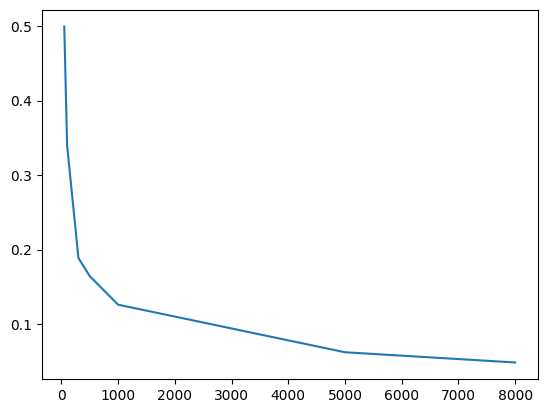

In [198]:
plt.plot(shot_line, megaresult)

Estimator tells us there's a good accordance

In [200]:
# Prepariamo lo stato
qc= QuantumCircuit(2)
qc.ry(theta, 0)
qc.ry(theta, 1)

# Misuriamo lo stato
estimator = Estimator()
job = estimator.run(qc, SparsePauliOp(["IX", "ZX","YZ","ZY"], [0.5, 2, 2./3,7]))

estimator_result = job.result().values[0]
print(f">>> Estimator Expectation value: {estimator_result}")

>>> Estimator Expectation value: 0.4330127018922199


To have an even better accordance we can average the result obtained for different runs of the circuit

In [201]:
result = []
for i in range(30):
    result.append(mega_run())

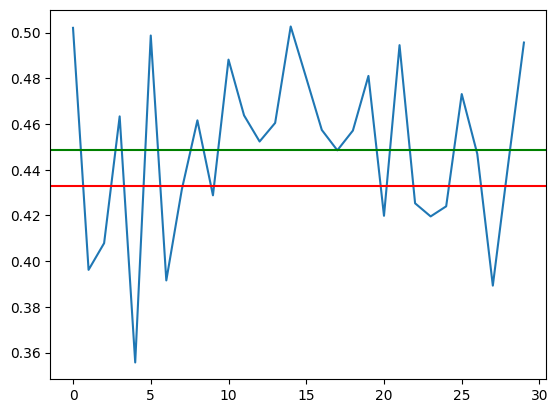

In [203]:
plt.plot(result)

plt.axhline(np.mean(np.array(result)), color="green")
plt.axhline(estimator_result, color="red")

__BONUS__: discutere il numero di misure necessarie per stimare $\langle H \rangle$ alla luce del principio di indeterminazione.

Il principio di indeterminazione afferma:
$\Delta A \Delta B \geq \frac{1}{2} |[A, B]|$.

Due osservabili che non commutano tra loro non possono essere misurate simultaneamente. Le matrici di Pauli non commutano tra loro, quindi per l'osservabile $H$ del punto 6 c'è bisogno di avere un numero di circuiti pari a 3: i primi due contributi di $H$ possono essere misurati simultaneamente perché sul qubit 0 agiscono $I$ e $Z$, che commutano e sul qubit 1 agisce $X$; gli ultimi due contributi vanno invece misurati con due circuiti diversi.

Questo discorso può essere generalizzato a una osservabile del tutto generica. Siccome la collezione delle matrici di Pauli e l'identità è una base dello spazio di Hilbert, ogni osservabile può essere decomposta come: $O = \sum_k w_k P_k$

A questo punto bisogna contare il numero di contributi di O che non commutano tra loro: quello è il numero di circuiti diversi che si necessita.